In [1]:
import pandas as pd


df = pd.read_csv('netflix.csv')

print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# Pregunta 6 
## Parte a)

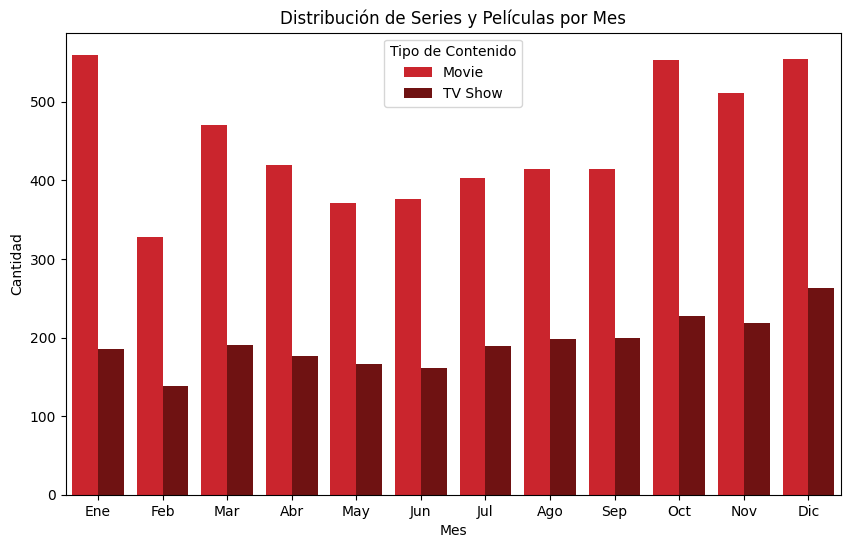

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir 'date_added' a formato datetime y extraer el mes
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month

# Agrupar por mes y tipo (series o películas)
content_by_month = df.groupby(['month_added', 'type']).size().reset_index(name='count')

# Configurar la paleta de colores sugerida
colors = ['#e50914', '#7f0202']

# Graficar la distribución de series y películas por mes
plt.figure(figsize=(10, 6))
sns.barplot(data=content_by_month, x='month_added', y='count', hue='type', palette=colors)
plt.title('Distribución de Series y Películas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Tipo de Contenido')
plt.show()


## Parte b)

In [3]:
unique_categories = df['listed_in'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'listed_in':")
print(unique_categories)

Valores únicos en 'listed_in':
['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Roman

In [4]:
from collections import Counter

# Dividir las categorías por comas y luego aplanar la lista
categories = df['listed_in'].str.split(', ').explode()

# Contar cuántas veces aparece cada categoría
category_counts = categories.value_counts()

# Mostrar los resultados
print(category_counts)


listed_in
International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action & Adventure               721
TV Dramas                        704
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      525
Thrillers                        491
Crime TV Shows                   427
Kids' TV                         414
Docuseries                       353
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 232
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
Korean TV Shows                  150
TV Action & Adventure            150
Anime Series                     148
Spanish-Language TV Shows   

In [5]:
# Reemplazar la palabra 'TV' con una cadena vacía
df['listed_in'] = df['listed_in'].str.replace('TV', '', regex=False)

# Dividir las categorías por comas
categories = df['listed_in'].str.split(', ', expand=True)

# Aplicar str.strip() a todas las categorías para eliminar espacios adicionales
categories = categories.apply(lambda x: x.str.strip())

# Contar la frecuencia de cada categoría después de dividir y limpiar
category_counts = categories.stack().value_counts()

# Mostrar las categorías y sus conteos
print(category_counts)


Dramas                          2810
International Movies            2437
Comedies                        1996
International  Shows            1199
Action & Adventure               871
Documentaries                    786
Independent Movies               673
Thrillers                        541
Children & Family Movies         532
Romantic Movies                  531
Crime  Shows                     427
Kids'                            414
Docuseries                       353
Romantic  Shows                  333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
Sci-Fi & Fantasy                 294
British  Shows                   232
Reality                          222
Sports Movies                    196
Korean  Shows                    150
Anime Series                     148
Spanish-Language  Shows          147
Classic Movies                   103
LGBTQ Movies                      90
Mysteries                         90
S

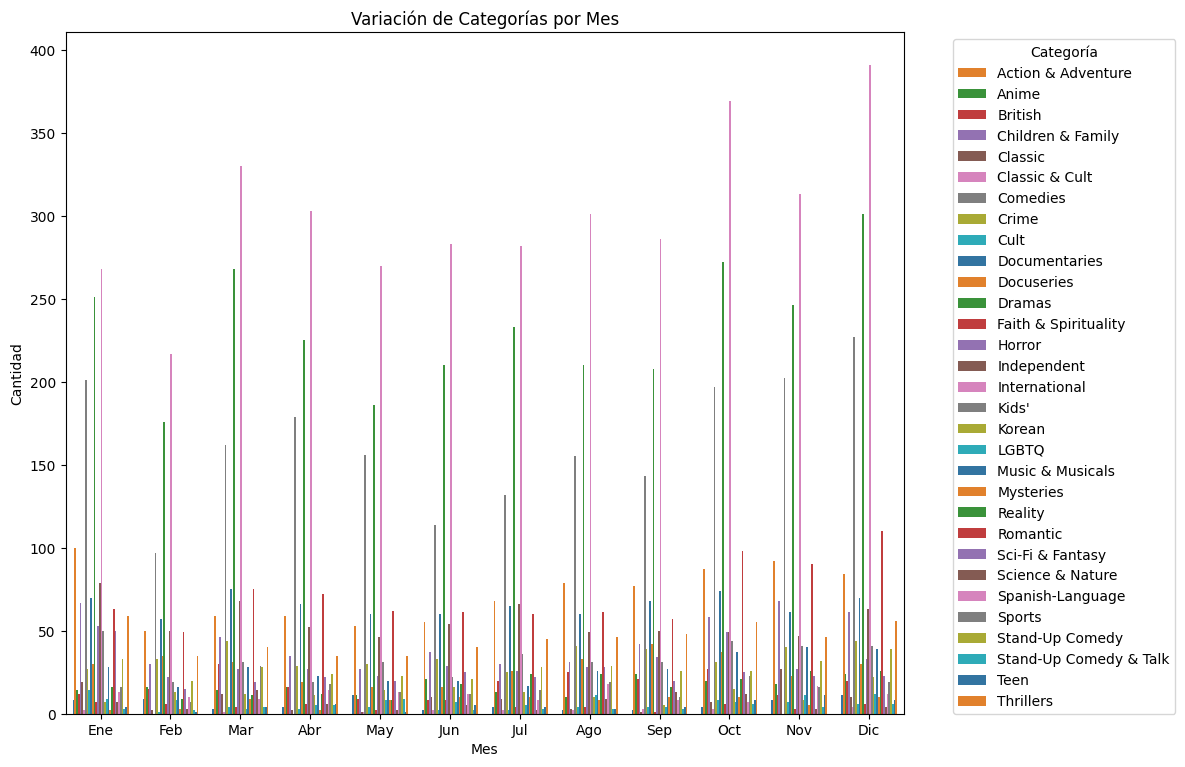

In [6]:
# Reemplazar 'TV', 'Movies', 'Shows', 'Series', 'Features' y limpiar espacios
df['listed_in'] = df['listed_in'].replace(['TV', 'Movies', 'Shows', 'Series', 'Features'], '', regex=True).str.strip()

# Dividir las categorías por comas, luego limpiar espacios adicionales en cada categoría
df['categories'] = df['listed_in'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Explode para convertir cada categoría en una fila independiente
df_exploded = df.explode('categories')

# Agrupar por mes y categoría (individual después del explode)
content_by_month_category = df_exploded.groupby(['month_added', 'categories']).size().reset_index(name='count')

# Graficar la variación de la categoría según el mes
plt.figure(figsize=(12, 8))
sns.barplot(data=content_by_month_category, x='month_added', y='count', hue='categories', palette='tab10')

plt.title('Variación de Categorías por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\P\AppData\Local\Temp\ipykernel_12972\2825920480.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_month = content_by_month_category.groupby('month_added').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


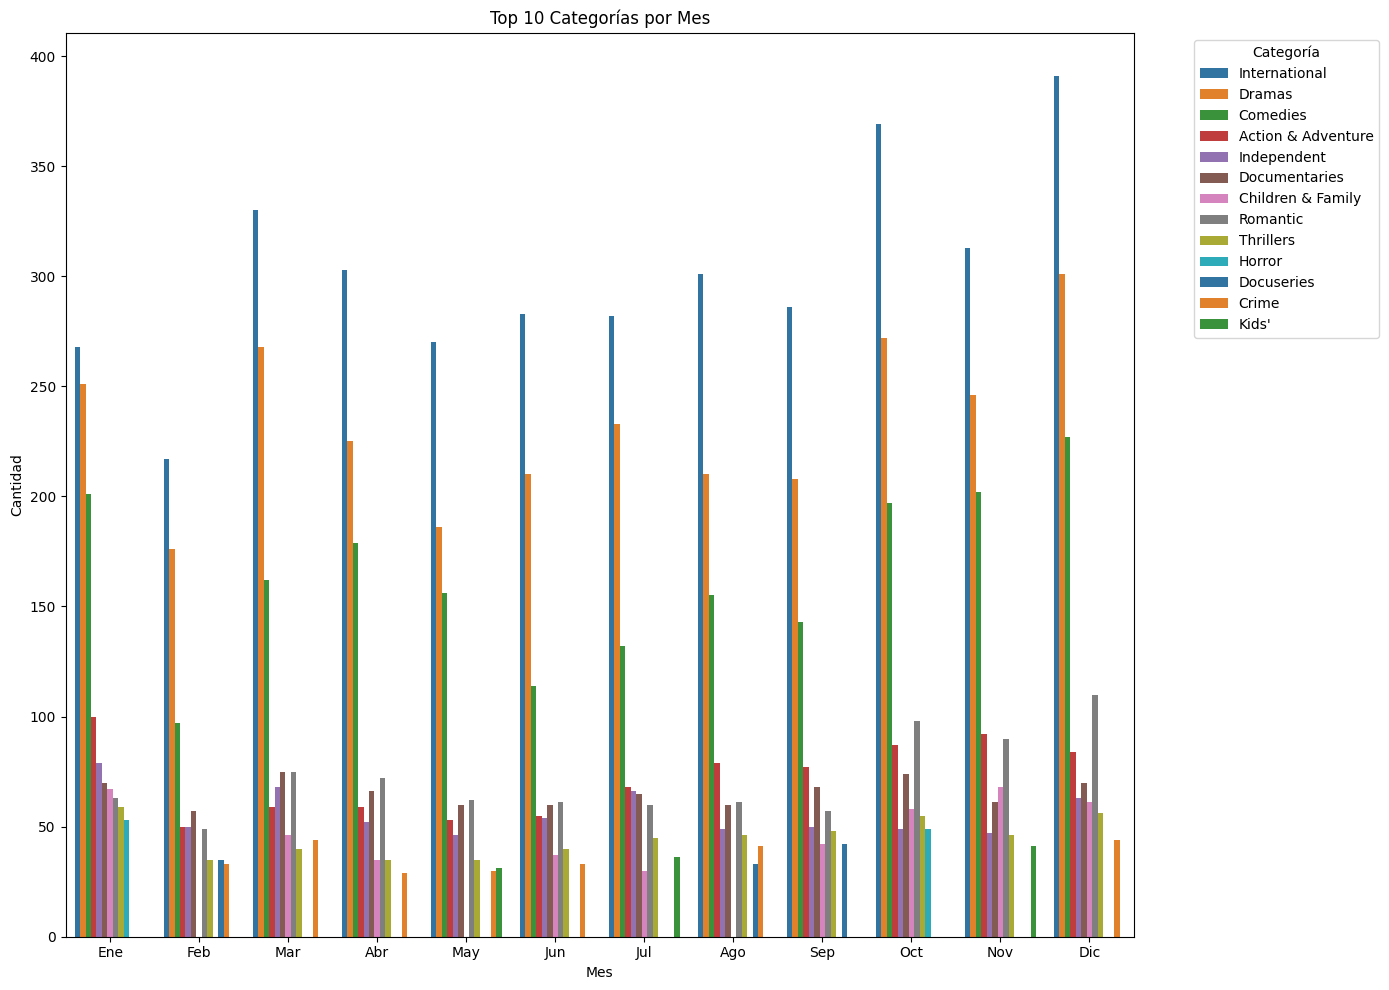

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazar 'TV', 'Movies', 'Shows', 'Series', 'Features' y limpiar espacios
df['listed_in'] = df['listed_in'].replace(['TV', 'Movies', 'Shows', 'Series', 'Features'], '', regex=True).str.strip()

# Dividir las categorías por comas, luego limpiar espacios adicionales en cada categoría
df['categories'] = df['listed_in'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Explode para convertir cada categoría en una fila independiente
df_exploded = df.explode('categories')

# Agrupar por mes y categoría (individual después del explode)
content_by_month_category = df_exploded.groupby(['month_added', 'categories']).size().reset_index(name='count')

# Filtrar las top 10 categorías por mes
top_categories_by_month = content_by_month_category.groupby('month_added').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Graficar la variación de la categoría según el mes
plt.figure(figsize=(14, 10))
sns.barplot(data=top_categories_by_month, x='month_added', y='count', hue='categories', palette='tab10')

plt.title('Top 10 Categorías por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


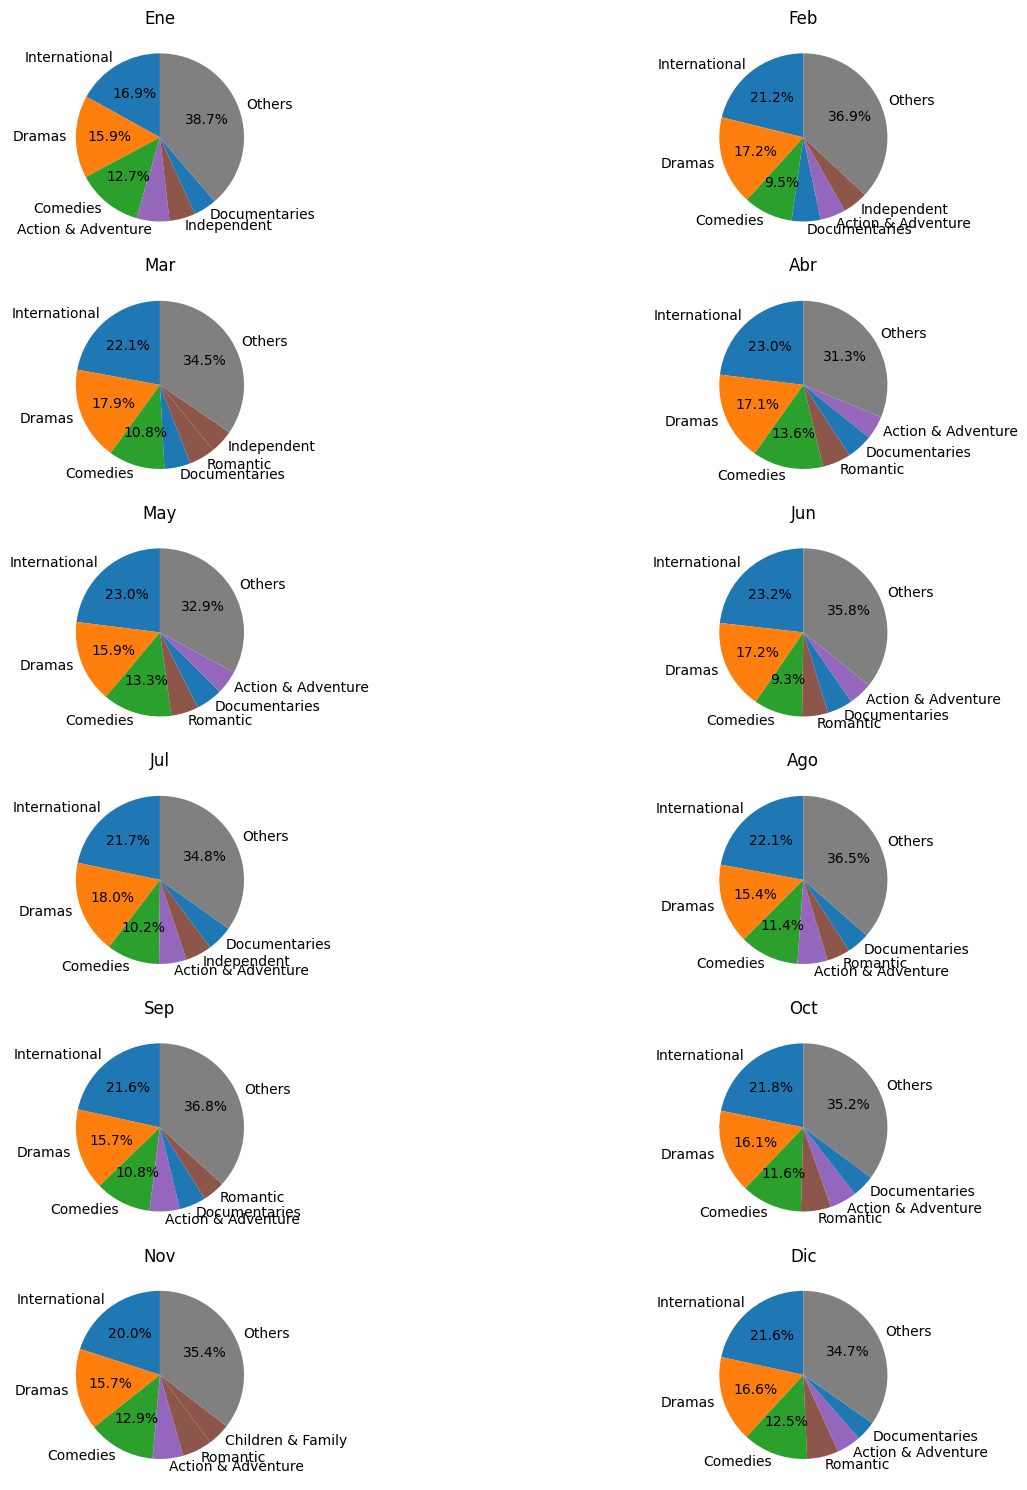

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una lista de iniciales para los meses
month_initials = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear una lista de colores para las categorías
unique_categories = df_exploded['categories'].unique()
colors_palette = sns.color_palette('tab10', n_colors=len(unique_categories))

# Crear un diccionario para mapear cada categoría a un color
category_color_map = dict(zip(unique_categories, colors_palette))

# Definir cuántos subplots (gráficos) habrá en cada fila y columna
n_cols = 2
n_rows = (len(month_initials) + n_cols - 1) // n_cols  # Calcular cuántas filas se necesitan

# Función para mostrar solo porcentajes mayores a 8%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 8 else ''

# Crear una figura con subplots para cada mes
plt.figure(figsize=(15, 15))

# Iterar a través de los meses únicos
for i, month in enumerate(range(1, 13), 1):  # De 1 a 12 para representar cada mes
    plt.subplot(n_rows, n_cols, i)  # Ajustar filas y columnas según la cantidad de meses
    
    # Filtrar los datos para el mes actual
    monthly_data = df_exploded[df_exploded['month_added'] == month]['categories'].value_counts()
    
    # Separar las 6 categorías principales
    top_6_categories = monthly_data.head(6)
    
    # Calcular la suma de las categorías restantes
    others_count = monthly_data[6:].sum()
    
    # Agregar la categoría "Others" con su suma
    top_6_categories['Others'] = others_count
    
    # Obtener los colores correspondientes a las categorías principales y a "Others"
    top_6_labels = top_6_categories.index
    colors = [category_color_map[category] if category in category_color_map else 'gray' for category in top_6_labels]
    
    # Graficar el pastel solo con las 6 principales + "Others", mostrando solo porcentajes > 8%
    plt.pie(top_6_categories, labels=top_6_labels, autopct=autopct_func, startangle=90, colors=colors)
    
    # Asignar el título con las iniciales del mes
    plt.title(f'{month_initials[month - 1]}')  # Restar 1 ya que `month` va de 1 a 12

plt.tight_layout()
plt.show()


In [9]:
unique_directors = df['director'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'directors':")
print(unique_directors)

# Mostrar los directores de la primera película
first_movie_directors = df['director'].iloc[2]
print("Directores de la primera película:", first_movie_directors)


Valores únicos en 'directors':
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Directores de la primera película: Gilbert Chan


Top 10 Directores más Populares:
directors
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       10
Shannon Hartman         9
Name: count, dtype: int64


C:\Users\P\AppData\Local\Temp\ipykernel_12972\3716246439.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette=netflix_colors)
C:\Users\P\AppData\Local\Temp\ipykernel_12972\3716246439.py:30: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette=netflix_colors)


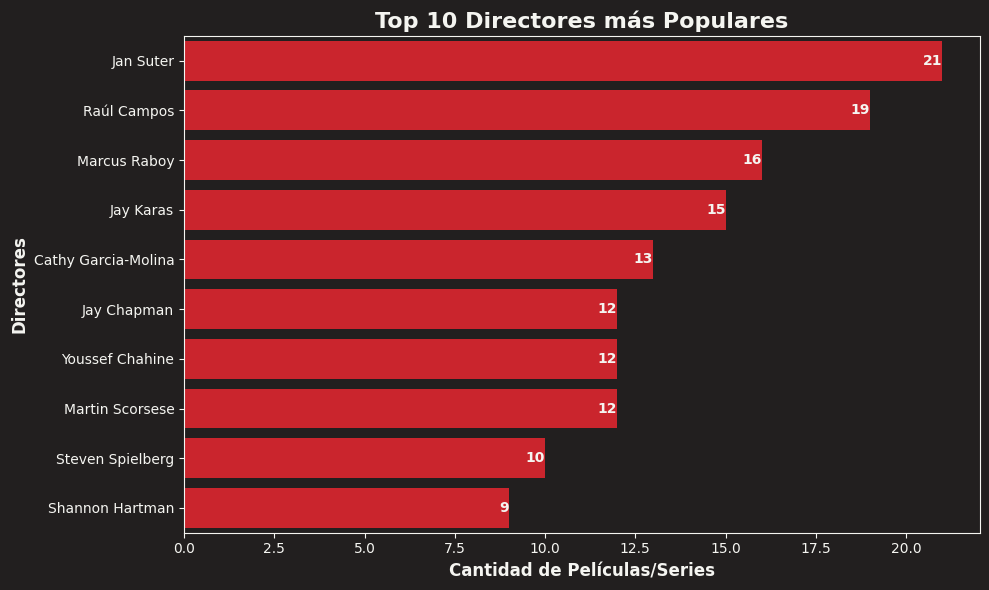

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rellenar valores nulos en la columna de directores con una cadena vacía
df['director'] = df['director'].fillna('')

# Reemplazar posibles espacios adicionales alrededor de los nombres de los directores
df['director'] = df['director'].str.strip()

# Dividir los directores por comas, luego limpiar espacios adicionales en cada nombre
df['directors'] = df['director'].str.split(', ').apply(lambda x: [i.strip() for i in x if i])

# Usar explode para separar cada director en filas individuales
df_exploded_directors = df.explode('directors')

# Contar la cantidad de veces que aparece cada director
director_counts = df_exploded_directors['directors'].value_counts()

# Mostrar los directores más populares
top_10_directors = director_counts.head(10)

print("Top 10 Directores más Populares:")
print(top_10_directors)

# Definir la paleta de colores personalizada de Netflix
netflix_colors = ['#e50914']

# Graficar los 10 directores más populares
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette=netflix_colors)

# Personalización del gráfico
plt.title('Top 10 Directores más Populares', fontsize=16, color='#f5f5f1', weight='bold')
plt.xlabel('Cantidad de Películas/Series', fontsize=12, color='#f5f5f1', weight='bold')
plt.ylabel('Directores', fontsize=12, color='#f5f5f1', weight='bold')

# Ajustes de estilo
plt.xticks(color='#f5f5f1')
plt.yticks(color='#f5f5f1')

# Cambiar el color de las líneas del eje
ax.spines['top'].set_color('#f5f5f1')
ax.spines['right'].set_color('#f5f5f1')
ax.spines['left'].set_color('#f5f5f1')
ax.spines['bottom'].set_color('#f5f5f1')

# Cambiar el color de las marcas de los ejes
ax.xaxis.set_tick_params(color='#f5f5f1')
ax.yaxis.set_tick_params(color='#f5f5f1')

# Fondo del gráfico
plt.gca().set_facecolor('#221f1f')
plt.grid(False)  # Desactivar la rejilla

# Color del fondo general de la figura
plt.gcf().set_facecolor('#221f1f')

# Añadir los números dentro de las barras
for i, value in enumerate(top_10_directors.values):
    ax.text(value, i, str(value), color='#f5f5f1', ha='right', va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


# Pregunta 10

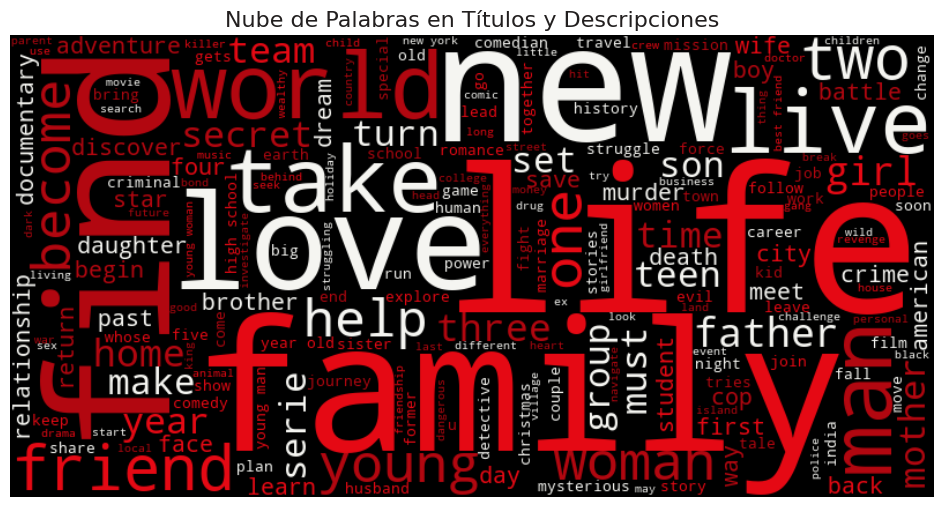

In [17]:
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Leer el archivo de stop words
with open('stop_words.txt', 'r') as file:
    stop_words = set(file.read().splitlines())

# Concatenar las columnas 'title' y 'description'
text = ' '.join(df['title'].dropna().astype(str)) + ' ' + ' '.join(df['description'].dropna().astype(str))

# Convertir el texto a minúsculas
text = text.lower()

# Eliminar caracteres especiales, signos de puntuación y números (solo conservar letras y espacios)
# Además, eliminamos múltiples espacios y los reemplazamos por uno solo
text = re.sub(r'[^a-z\s]', ' ', text)  # Reemplazar cualquier cosa que no sea letras por un espacio
text = re.sub(r'\s+', ' ', text)  # Reemplazar múltiples espacios por un solo espacio

# Dividir en palabras
words = text.split()

# Eliminar las stop words
filtered_words = [word for word in words if word not in stop_words]

# Volver a unir las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_words)

# Función personalizada para asignar colores
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#e50914', '#b20710', '#f5f5f1']  # Colores especificados
    return random.choice(colors)

# Crear la nube de palabras con la función de colores personalizada
wordcloud = WordCloud(width=800, height=400, background_color='black', color_func=color_func).generate(filtered_text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Títulos y Descripciones', fontsize=16, color='#221f1f')
plt.show()
